In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.cluster import KMeans

In [138]:
master_df = pd.read_csv("../output/master_df.csv")
master_df

,distname,schoolname,flag_nerds,flag_f33,ncesenroll,gradespan,pp_stloc_raw_MA,pp_fed_raw_MA,pp_total_raw_MA,schoolstloc_raw_MA,...,females_staff,males_staff,fte_staff,student_teacher_ratio,student_teacher_ratio_nan_flag,District Name,District Code,salary_totals_teachers,avg_salary_teachers,no_salary_flag
0,Abington,Abington High,0,0,545.0,09-12,14880.475672,20.812074,14901.287746,8.052652e+06,...,72.5,27.5,62,14.4,False,Abington,10000.0,11469788.0,93861.0,False
1,Abington,Abington Middle School,0,0,672.0,05-08,13057.825084,83.417661,13141.242745,8.839857e+06,...,77.3,22.7,73,17.6,False,Abington,10000.0,11469788.0,93861.0,False
2,Abington,Woodsdale Elementary School,0,0,294.0,03-04,13201.700857,499.583587,13701.284443,3.841768e+06,...,88.8,11.2,39,18.0,False,Abington,10000.0,11469788.0,93861.0,False
3,Acton-Boxborough,Acton-Boxborough Regional High,0,0,1837.0,09-12,14634.333856,191.007988,14825.341844,2.676628e+07,...,76.1,23.9,195,14.7,False,Acton-Boxborough,6000000.0,32945978.0,86677.0,False
4,Acton-Boxborough,Blanchard Memorial School,0,0,464.0,KG-06,16005.357328,289.306328,16294.663656,7.481971e+06,...,91.4,8.6,79,14.3,False,Acton-Boxborough,6000000.0,32945978.0,86677.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,Worcester,Worcester East Middle,0,0,766.0,07-08,14603.898777,923.333657,15527.232434,1.110659e+07,...,62.5,37.5,82,12.8,False,Worcester,3480000.0,151535395.0,80121.0,False
1441,Worcester,Worcester Technical High,0,0,1426.0,09-12,16973.789244,812.745854,17786.535098,2.374180e+07,...,49.0,51.0,176,10.9,False,Worcester,3480000.0,151535395.0,80121.0,False
1442,Worthington,R. H. Conwell,1,1,74.0,PK-06,16583.928533,219.228195,16803.156728,1.239096e+06,...,83.8,16.3,16,10.6,False,Worthington,3490000.0,376966.0,53852.0,False
1443,Wrentham,Charles E Roderick,0,0,442.0,04-06,16436.024662,279.413743,16715.438405,7.210758e+06,...,94.8,5.2,63,12.8,False,Wrentham,3500000.0,6138763.0,76543.0,False


## 2.1 Cluster Analysis - General Insight Extraction (WIP)
- format the learnings into more readable / understandable format
- maybe write one sentence blurbs for each one too
- need to add more columns for some of the correlation analysis
- analyze the hierarchal outcome. what were the main groupings?
- add a paragraph summarizing the learnings in the last section

### 2.1.0 Defining KMeans Function

In [139]:
def kmeans_func(clusters, df):
    # select the columns you want to calculate correlation with
    columns_of_interest = ['avg_score', 'pp_stloc_raw_MA', 'pp_fed_raw_MA', 'pp_total_raw_MA', 'ncesenroll', 'pp_stloc_raw_MA', 'pp_fed_raw_MA','First Language Not English %', 'student_teacher_ratio','High Needs #.1', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'Native American', 'Native Hawaiian, Pacific Islander', 'avg_salary_teachers', 'student_teacher_ratio']
    
    # calculate the correlations between the selected columns and the test performance column
    filtered_df = df[columns_of_interest]
    filtered_df = filtered_df.dropna()
    
    # standardize the data
    df_standardized = (filtered_df - filtered_df.mean()) / filtered_df.std()
    
    # fit the k-means algorithm on the standardized data
    kmeans = KMeans(n_clusters=clusters, random_state=0).fit(df_standardized)

    # get the cluster labels for each school
    cluster_labels = kmeans.labels_

    # add the cluster labels as a new column to the original dataframe
    filtered_df['cluster'] = cluster_labels

    # calculate the mean values of each feature for each cluster
    cluster_means = filtered_df.groupby('cluster').mean()

    # explanatory analysis
    print(filtered_df['cluster'].value_counts())
    return cluster_means

### 2.1.1 All Schools - 2 Clusters

In [140]:
cluster = kmeans_func(2, master_df)
cluster[['avg_score', 'pp_stloc_raw_MA', 'pp_fed_raw_MA', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'avg_salary_teachers']]

0    1053
1     392
Name: cluster, dtype: int64


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,avg_score,pp_stloc_raw_MA,pp_stloc_raw_MA,pp_fed_raw_MA,pp_fed_raw_MA,Economically Disadvantaged %,African American,Asian,Hispanic,White,avg_salary_teachers
cluster,,,,,,,,,,,
0,505.849612,16090.708543,16090.708543,357.619905,357.619905,19.447768,3.637607,6.664672,7.832289,77.483001,80590.998101
1,490.801956,15729.980662,15729.980662,1196.287838,1196.287838,60.816582,16.542347,6.119898,47.182143,26.053061,79824.562925


### 2.1.2 All Schools - 4 Clusters

1    613
3    437
2    335
0     60
Name: cluster, dtype: int64


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot: title={'center': 'Cluster 0'}, xlabel='cluster'>

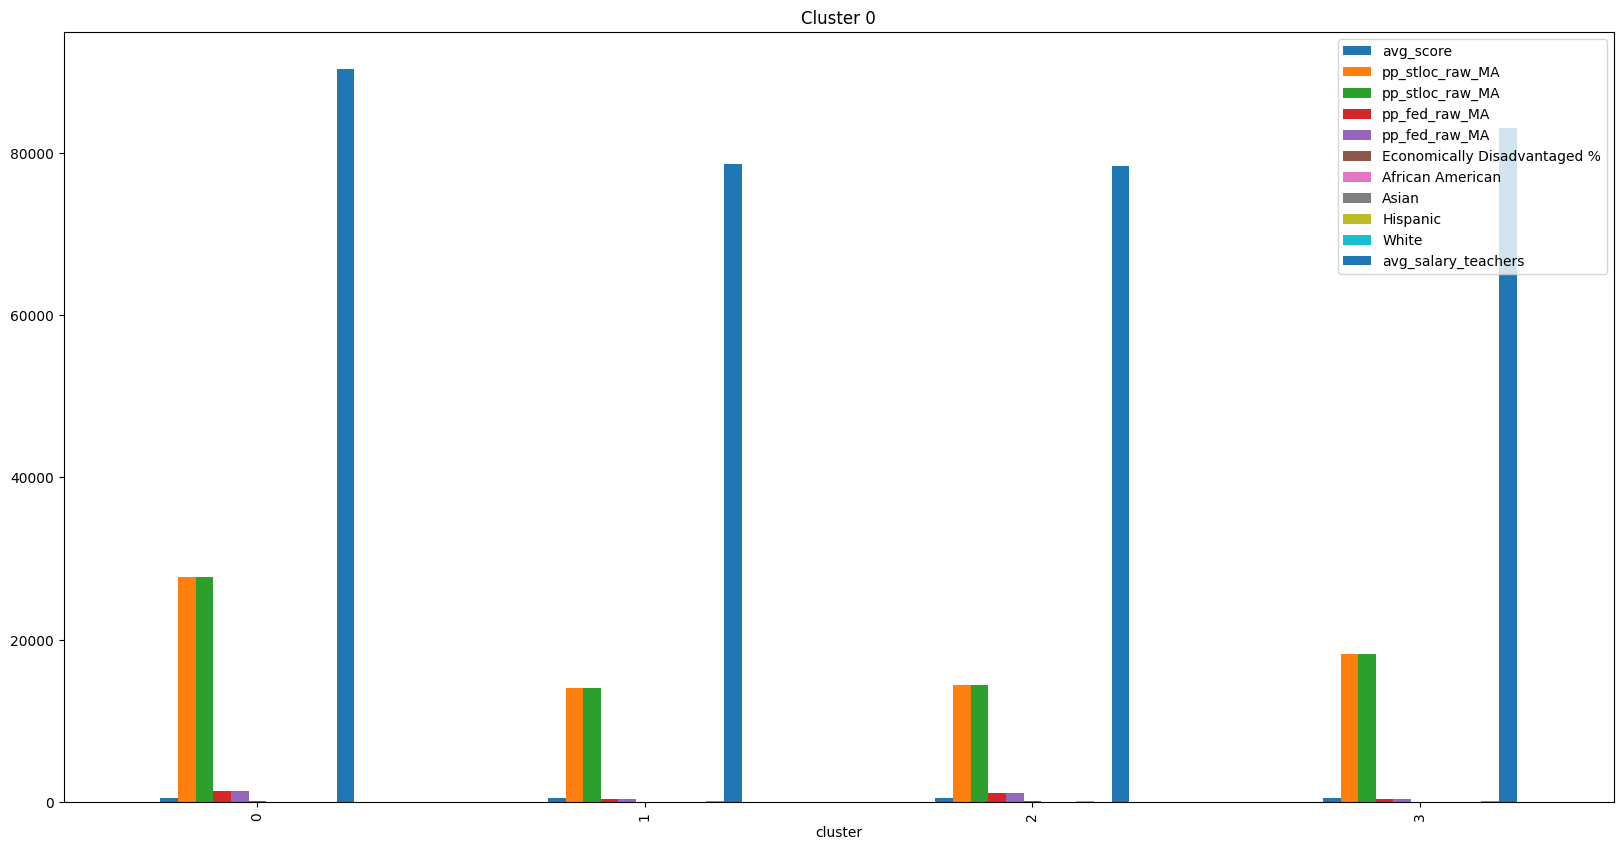

In [150]:
cluster = kmeans_func(4, master_df)
cluster[['avg_score', 'pp_stloc_raw_MA', 'pp_fed_raw_MA', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'avg_salary_teachers']]

# Save as latex
with open('../output/tex/all_cluster.tex', 'w') as tf:
    tf.write(cluster[['avg_score', 'pp_stloc_raw_MA', 'pp_fed_raw_MA', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'avg_salary_teachers']].to_latex())

### 2.1.3 KMeans - 6 Clusters

In [142]:
cluster = kmeans_func(6, master_df)
cluster[['avg_score', 'pp_stloc_raw_MA', 'pp_fed_raw_MA', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'avg_salary_teachers']]


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3    474
5    374
0    292
1    214
2     50
4     41
Name: cluster, dtype: int64


,avg_score,pp_stloc_raw_MA,pp_stloc_raw_MA,pp_fed_raw_MA,pp_fed_raw_MA,Economically Disadvantaged %,African American,Asian,Hispanic,White,avg_salary_teachers
cluster,,,,,,,,,,,
0,491.165525,14284.482115,14284.482115,1199.835604,1199.835604,62.941438,11.195548,5.851370,53.375342,25.657877,77102.283811
1,513.291316,17350.089564,17350.089564,268.792247,268.792247,10.385047,4.034579,20.696729,6.254673,63.571495,90134.724299
2,489.403167,17851.841046,17851.841046,1192.198611,1192.198611,55.198000,51.702000,5.444000,26.000000,12.574000,93991.915871
3,504.762570,13773.481534,13773.481534,329.890080,329.890080,19.472152,3.014768,3.683755,7.625527,81.921308,77971.820675
4,492.529878,30660.926576,30660.926576,1092.491333,1092.491333,45.960976,15.782927,5.565854,24.778049,46.975610,86691.487805
5,502.320833,17506.310914,17506.310914,472.928025,472.928025,26.318717,4.067647,2.761230,10.396524,78.397326,77909.791444


## 2.2 Cluster Analysis - High Schools

### 2.2.1 High Schools - 2 Clusters

In [143]:
# filter dataframe to only high schools
df_highschool = master_df.dropna(subset=['gradespan'])
df_highschool = df_highschool[df_highschool['gradespan'].str.contains('09-12') | df_highschool['gradespan'].str.contains('08-12')]

cluster = kmeans_func(2, df_highschool)
cluster[['avg_score', 'pp_stloc_raw_MA', 'pp_fed_raw_MA', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'avg_salary_teachers']]

# Save as latex
with open('../output/tex/highschool_cluster.tex', 'w') as tf:
    tf.write(cluster[['avg_score', 'pp_stloc_raw_MA', 'pp_fed_raw_MA', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'avg_salary_teachers']].to_latex())

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    195
0     52
Name: cluster, dtype: int64


/var/folders/1y/tx5xv7mx325cz5z1q7xc35sm0000gn/T/ipykernel_74365/3913855844.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(cluster[['avg_score', 'pp_stloc_raw_MA', 'pp_fed_raw_MA', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'avg_salary_teachers']].to_latex())


### 2.2.1 High Schools - 4 Clusters

In [144]:
# filter dataframe to only high schools
df_highschool = master_df.dropna(subset=['gradespan'])
df_highschool = df_highschool[df_highschool['gradespan'].str.contains('09-12') | df_highschool['gradespan'].str.contains('08-12')]

cluster = kmeans_func(4, df_highschool)
cluster[['avg_score', 'pp_stloc_raw_MA', 'pp_fed_raw_MA', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'avg_salary_teachers']]


0    139
1     60
2     27
3     21
Name: cluster, dtype: int64


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,avg_score,pp_stloc_raw_MA,pp_stloc_raw_MA,pp_fed_raw_MA,pp_fed_raw_MA,Economically Disadvantaged %,African American,Asian,Hispanic,White,avg_salary_teachers
cluster,,,,,,,,,,,
0,511.794544,15331.169283,15331.169283,217.304833,217.304833,14.197842,3.039568,5.614388,6.240288,82.200719,81222.841727
1,501.616806,20583.401072,20583.401072,579.512982,579.512982,29.888333,5.216667,2.770000,14.045000,73.365000,80351.450000
2,496.269136,14233.670655,14233.670655,627.488344,627.488344,45.907407,13.014815,9.496296,37.074074,36.877778,80399.333333
3,486.711905,19259.109553,19259.109553,1653.607450,1653.607450,61.028571,25.880952,3.923810,50.852381,16.509524,86717.963717


## 2.3 Cluster Analysis - High performing, High income Schools

### 2.3.1 High performing, high income schools - 2 clusters

In [145]:
# filter dataframe to only high performing, high income
score_threshold = master_df['avg_score'].quantile(0.7)
income_threshold = master_df['Economically Disadvantaged %'].quantile(0.3)
filtered_df = master_df[(master_df['avg_score'] >= score_threshold) & (master_df['Economically Disadvantaged %'] <= income_threshold)]

cluster = kmeans_func(2, filtered_df)
cluster[['avg_score', 'pp_stloc_raw_MA', 'pp_fed_raw_MA', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'avg_salary_teachers']]

# Save as latex
with open('../output/tex/highperforming_highincome_cluster.tex', 'w') as tf:
    tf.write(cluster[['avg_score', 'pp_stloc_raw_MA', 'pp_fed_raw_MA', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'avg_salary_teachers']].to_latex())

1    215
0    117
Name: cluster, dtype: int64


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/1y/tx5xv7mx325cz5z1q7xc35sm0000gn/T/ipykernel_74365/1939448358.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(cluster[['avg_score', 'pp_stloc_raw_MA', 'pp_fed_raw_MA', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'avg_salary_teachers']].to_latex())


### 2.3.2 - High performing, high income schools - 4 clusters

In [146]:
# filter dataframe to only high performing, high income
score_threshold = master_df['avg_score'].quantile(0.7)
income_threshold = master_df['Economically Disadvantaged %'].quantile(0.3)
filtered_df = master_df[(master_df['avg_score'] >= score_threshold) & (master_df['Economically Disadvantaged %'] <= income_threshold)]

cluster = kmeans_func(4, filtered_df)
cluster[['avg_score', 'pp_stloc_raw_MA', 'pp_fed_raw_MA', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'avg_salary_teachers']]


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    107
3    105
2     60
0     60
Name: cluster, dtype: int64


,avg_score,pp_stloc_raw_MA,pp_stloc_raw_MA,pp_fed_raw_MA,pp_fed_raw_MA,Economically Disadvantaged %,African American,Asian,Hispanic,White,avg_salary_teachers
cluster,,,,,,,,,,,
0,516.182917,19591.912755,19591.912755,227.353305,227.353305,5.481667,3.550000,13.228333,5.296667,72.093333,96377.433333
1,511.970794,15758.995407,15758.995407,269.386163,269.386163,9.068224,1.378505,4.378505,3.764486,87.535514,81310.457944
2,514.377500,16319.980392,16319.980392,283.180451,283.180451,8.118333,4.186667,28.170000,6.815000,54.720000,87193.883333
3,513.663016,13694.375560,13694.375560,174.012713,174.012713,7.623810,2.459048,9.370476,4.363810,79.572381,82311.514286


## 2.4 What type of features do high performing, low income schools have?

In [147]:
# filter dataframe to only high performing, low income
score_threshold = master_df['avg_score'].quantile(0.7)
income_threshold = master_df['Economically Disadvantaged %'].quantile(0.7)
filtered_df = master_df[(master_df['avg_score'] >= score_threshold) & (master_df['Economically Disadvantaged %'] >= income_threshold)]
filtered_df

,distname,schoolname,flag_nerds,flag_f33,ncesenroll,gradespan,pp_stloc_raw_MA,pp_fed_raw_MA,pp_total_raw_MA,schoolstloc_raw_MA,...,females_staff,males_staff,fte_staff,student_teacher_ratio,student_teacher_ratio_nan_flag,District Name,District Code,salary_totals_teachers,avg_salary_teachers,no_salary_flag
194,Brooke Charter School,Brooke Charter School,0,0,1853.0,KG-12,18939.860149,1494.582171,20434.442320,3.493931e+07,...,81.4,18.6,215,11.7,False,NaN,NaN,4.237051e+07,80383.079354,True
442,Gill-Montague,Turners Fall High,0,0,202.0,09-12,20013.840792,145.606137,20159.446929,4.010774e+06,...,72.7,27.3,43,8.3,False,Gill-Montague,6740000.0,5.499587e+06,62213.000000,False
637,Lynn,Capt William G Shoemaker,0,0,318.0,PK-05,16184.207293,1921.303664,18105.510957,5.269758e+06,...,95.3,4.7,71,9.6,False,Lynn,1630000.0,8.729169e+07,77606.000000,False
808,New Bedford,James B Congdon,0,0,323.0,KG-05,13392.063357,871.505310,14263.568667,4.276160e+06,...,93.7,6.3,32,15.0,False,New Bedford,2010000.0,6.947675e+07,74180.000000,False
949,Pioneer Charter School of Science,Pioneer Charter School of Science,0,0,789.0,KG-12,13370.368108,744.058112,14114.426219,1.048250e+07,...,73.6,26.4,96,10.3,False,NaN,NaN,4.237051e+07,80383.079354,True
1079,Shutesbury,Shutesbury Elementary,0,0,128.0,PK-06,20410.211977,645.669133,21055.881110,2.590169e+06,...,91.1,8.9,33,7.8,False,Shutesbury,2720000.0,1.004379e+06,61243.000000,False
1123,Springfield,Chestnut Accelerated Middle School (Talented a...,1,1,326.0,06-08,16125.763319,1887.108685,18012.872004,5.180581e+06,...,71.6,28.4,47,11.9,False,Springfield,2810000.0,1.394181e+08,71511.000000,False
1168,Springfield Preparatory Charter School,Springfield Preparatory Charter School,1,1,271.0,KG-05,13743.011479,2164.574373,15907.585853,3.706765e+06,...,91.8,8.2,34,11.5,False,NaN,NaN,4.237051e+07,80383.079354,True


## 2.5 What type of features do low performing, low income schools have?

In [148]:
# filter dataframe to only low performing, low income
score_threshold = master_df['avg_score'].quantile(0.3)
income_threshold = master_df['Economically Disadvantaged %'].quantile(0.7)
filtered_df = master_df[(master_df['avg_score'] <= score_threshold) & (master_df['Economically Disadvantaged %'] >= income_threshold)]

cluster = kmeans_func(2, filtered_df)
cluster[['avg_score', 'pp_stloc_raw_MA', 'pp_fed_raw_MA', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'avg_salary_teachers']]

# Save as latex
with open('../output/tex/lowperforming_lowincome_cluster.tex', 'w') as tf:
    tf.write(cluster[['avg_score', 'pp_stloc_raw_MA', 'pp_fed_raw_MA', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'avg_salary_teachers']].to_latex())

1    300
0     42
Name: cluster, dtype: int64


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/1y/tx5xv7mx325cz5z1q7xc35sm0000gn/T/ipykernel_74365/4116750062.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(cluster[['avg_score', 'pp_stloc_raw_MA', 'pp_fed_raw_MA', 'Economically Disadvantaged %', 'African American', 'Asian', 'Hispanic', 'White', 'avg_salary_teachers']].to_latex())


## 2.6 What type of features do low performing, high income schools have?

In [149]:
# filter dataframe to only low performing, low income
score_threshold = master_df['avg_score'].quantile(0.3)
income_threshold = master_df['Economically Disadvantaged %'].quantile(0.3)
filtered_df = master_df[(master_df['avg_score'] <= score_threshold) & (master_df['Economically Disadvantaged %'] <= income_threshold)]
filtered_df

,distname,schoolname,flag_nerds,flag_f33,ncesenroll,gradespan,pp_stloc_raw_MA,pp_fed_raw_MA,pp_total_raw_MA,schoolstloc_raw_MA,...,females_staff,males_staff,fte_staff,student_teacher_ratio,student_teacher_ratio_nan_flag,District Name,District Code,salary_totals_teachers,avg_salary_teachers,no_salary_flag
590,Lincoln,Hanscom Primary,0,0,305.0,PK-03,21924.322562,486.673367,22410.99593,6.884724e+06,...,95.7,4.3,59,10.3,False,Lincoln,1570000.0,10826154.0,90520.0,False
